# SciPy

## SciPy versus NumPy
Notice that, when we import SciPy, we also get NumPy: SciPy's initialization file imports many NumPy modules.

## Statistics

In [1]:
import scipy.stats

### Random Variables and Distributions
NumPy implementation: np.random.beta(a, b, size = n); a, b are parameters to a Beta distribution function.
However, the NumPy approach doesn't allow the user to access the density function, the quantiles, etc -- which might be very useful, in some cases --, while SciPy does.

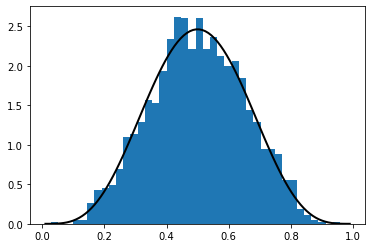

In [3]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [6]:
# The object q that represents the distribution has additional useful methods, including

print(f'Cumulative distribution function (for 40%): {q.cdf(0.4)}')
print(f'Quantile (for 80%): {q.ppf(0.8)}')
print(f'Mean: {q.mean()}')

Cumulative distribution function (for 40%): 0.26656768000000003
Quantile (for 80%): 0.6339134834642708
Mean: 0.5


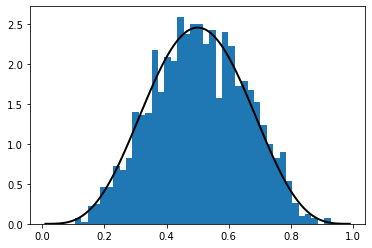

In [7]:
# Alternative syntax for the previous example
obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()

### Linear regression

In [9]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)

print(f'Gradient: {gradient}')
print(f'Intercept: {intercept}')

Gradient: 2.020694773638508
Intercept: 0.012041652449046217


## Roots and Fixed Points

The following code analyzes 

$f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1$

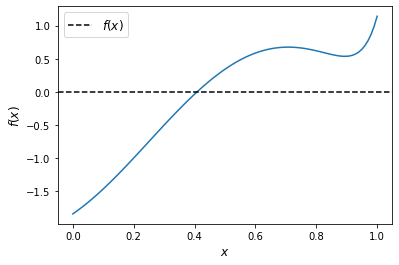

In [19]:
# The analyzed function is attributed to f with a lambda
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
# f = lambda x: x * np.sin(x)**2
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.axhline(ls='--', c='k', label='$f(x)$')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

### Bisection

In [23]:
import scipy.optimize

In [24]:
# Manual implementation
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:   # root is between lower and middle
            lower, upper = lower, middle
        else:               # root is between middle and upper
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

print(f'Manual implementation: {bisect(f, 0, 1)}')
print(f'SciPy implementation: {scipy.optimize.bisect(f, 0, 1)}')

Manual implementation: 0.408294677734375
SciPy implementation: 0.4082935042806639


### The Newton-Raphson Method

In [ ]:
import scipy.optimize

In [25]:
scipy.optimize.newton(f, 0.2)   # Start the search at initial condition x = 0.2

0.40829350427935673

## Optimization

In [27]:
import scipy.optimize

# Minimization
minimum = scipy.optimize.fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]
print(f'Minimum for f(x) = x^2 in [-1, 2]: {minimum}')

Minimum for f(x) = x^2 in [-1, 2]: 0.0


### Multivariate Optimization
Multivariate local optimizers include minimize, fmin, fmin_powell, fmin_cg, fmin_bfgs, and fmin_ncg.

Constrained multivariate local optimizers include fmin_l_bfgs_b, fmin_tnc, fmin_cobyla.

[Documentation](http://docs.scipy.org/doc/scipy/reference/optimize.html)

## Integration

In [29]:
import scipy.integrate

In [34]:
%%time

# Integrates the function from 0 to 1 with the Clenshaw-Curtis quadrature method
integral, error = scipy.integrate.quad(lambda x: x**2, 0, 1)
print(f'Quad integral with scipy.integrate.quad: {integral}')

Quad integral with scipy.integrate.quad: 0.33333333333333337
Wall time: 0 ns


In [33]:
%%time

# Integrates the function from 0 to 1 with the fixed quadrature method, a faster approach for loops
integral, error = scipy.integrate.fixed_quad(lambda x: x**2, 0, 1)
print(f'Quad integral with scipy.integrate.fixed_quad: {integral}')

Quad integral with scipy.integrate.fixed_quad: 0.33333333333333326
Wall time: 1e+03 µs


## Linear Algebra
Linear Algebra methods are available in the linalg method. [Documentation](https://docs.scipy.org/doc/scipy/reference/linalg.html)